#Project 4: Women in the NY Times

this notebook uses spacy for sentiment analysis to see how the polarity and subjectivity 

#Installs & Imports

In [1]:
!pip install spacy
!python -m spacy download en_core_web_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-03 13:40:29.766271: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 13:40:33.182236: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [3]:
import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))


<ipython-input-3-4b8e0e931b09>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.7 MB/s eta 0:00:00


In [5]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 18.7 MB/s eta 0:00:00


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading & Cleaning Data

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 4/Data/only_combined.csv')
print(df.shape)
df.head()

(10000, 3)


,year,decade,Combined_Text
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ..."
1,1922,1920,"LONDON, Jan. 30.--Ought girls to be allowed to..."
2,1923,1920,J Oudegeest compares development in U S and Eu...
3,1927,1920,Statement on play by Chinese student to be pro...
4,1928,1920,CITY COLLEGE DRILLS AGAINST R.P.I. PLAYS Varsi...


In [10]:
df.memory_usage()

Index              128
year             80000
decade           80000
Combined_Text    80000
dtype: int64

In [11]:
df.isna().sum()

year             0
decade           0
Combined_Text    0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
# from spellchecker import SpellChecker

# # initialize spellchecker
# spell = SpellChecker()

# # iterate over all rows in the DataFrame
# for i, row in df.iterrows():
#     # get text from the row
#     text = row['text']
    
#     # check for NaN values
#     if pd.isna(text):
#         continue
        
#     # convert to lowercase
#     text = text.lower()
    
#     # correct misspellings
#     words = text.split()
#     corrected = [spell.correction(word) for word in words]
#     text = ' '.join(corrected)
    
#     # update the row with the cleaned text
#     df.at[i, 'clean_text'] = text


#Sentiment Analysis
Polarity Score: 
Subjectivity Score: 

In [14]:
from textblob import TextBlob

#empty lists for scores
polarity_scores = []
subjectivity_scores = []

#for loop per row, finds polarity & subjectivity 
for index, row in df.iterrows():
    text = row['Combined_Text']
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Add the sentiment scores to the lists
    polarity_scores.append(polarity)
    subjectivity_scores.append(subjectivity)

#add score columns to df
df['polarity_score'] = polarity_scores
df['subjectivity_score'] = subjectivity_scores

In [15]:
df.head()

,year,decade,Combined_Text,polarity_score,subjectivity_score
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ...",0.10034,0.418787
1,1922,1920,"LONDON, Jan. 30.--Ought girls to be allowed to...",0.30000,0.200000
2,1923,1920,J Oudegeest compares development in U S and Eu...,-0.24000,0.280000
3,1927,1920,Statement on play by Chinese student to be pro...,0.07500,0.236667
4,1928,1920,CITY COLLEGE DRILLS AGAINST R.P.I. PLAYS Varsi...,0.10000,0.400000


In [16]:
for index, row in df.iterrows():
    polarity_score = row['polarity_score']
    if polarity_score >= 0.9:
        df.at[index, 'sentiment'] = 'very positive'
    elif polarity_score >= 0.1 and polarity_score < 0.9:
        df.at[index, 'sentiment'] = 'positive'
    elif polarity_score > -0.1 and polarity_score < 0.1:
        df.at[index, 'sentiment'] = 'neutral'
    elif polarity_score <= -0.1 and polarity_score > -0.9:
        df.at[index, 'sentiment'] = 'negative'
    else:
        df.at[index, 'sentiment'] = 'very negative'


df.head()

,year,decade,Combined_Text,polarity_score,subjectivity_score,sentiment
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ...",0.10034,0.418787,positive
1,1922,1920,"LONDON, Jan. 30.--Ought girls to be allowed to...",0.30000,0.200000,positive
2,1923,1920,J Oudegeest compares development in U S and Eu...,-0.24000,0.280000,negative
3,1927,1920,Statement on play by Chinese student to be pro...,0.07500,0.236667,neutral
4,1928,1920,CITY COLLEGE DRILLS AGAINST R.P.I. PLAYS Varsi...,0.10000,0.400000,positive


In [17]:
df['intensity'] = df['polarity_score'].abs()
df.head()

,year,decade,Combined_Text,polarity_score,subjectivity_score,sentiment,intensity
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ...",0.10034,0.418787,positive,0.10034
1,1922,1920,"LONDON, Jan. 30.--Ought girls to be allowed to...",0.30000,0.200000,positive,0.30000
2,1923,1920,J Oudegeest compares development in U S and Eu...,-0.24000,0.280000,negative,0.24000
3,1927,1920,Statement on play by Chinese student to be pro...,0.07500,0.236667,neutral,0.07500
4,1928,1920,CITY COLLEGE DRILLS AGAINST R.P.I. PLAYS Varsi...,0.10000,0.400000,positive,0.10000


Let's look at how sentiment is being judged for a subset of rows

In [49]:
# randomly select 10 rows from df
new_df = df.sample(n=10, random_state=42)

# reset the index of the new DataFrame
new_df = new_df.reset_index(drop=True)

In [52]:
# Iterate over all the rows in the DataFrame
for index, row in new_df.iterrows():
    # Get the text from the row
    text = row['Combined_Text']
    
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment assessments for the TextBlob object
    sentiment_assessments = blob.sentiment_assessments.assessments

    # Print the sentiment assessments
    print(sentiment_assessments)

[]
[]
[(['busy'], 0.1, 0.3, None), (['british'], 0.0, 0.0, None)]
[(['straight'], 0.2, 0.4, None), (['big'], 0.0, 0.1, None), (['ten'], 0.0, 0.0, None), (['straight'], 0.2, 0.4, None), (['big'], 0.0, 0.1, None), (['ten'], 0.0, 0.0, None)]
[(['upper'], 0.0, 0.0, None)]
[(['last'], 0.0, 0.06666666666666667, None), (['last'], 0.0, 0.06666666666666667, None), (['new'], 0.13636363636363635, 0.45454545454545453, None), (['expected'], -0.1, 0.4, None), (['third'], 0.0, 0.0, None), (['red'], 0.0, 0.0, None), (['white'], 0.0, 0.0, None), (['second'], 0.0, 0.0, None), (['game'], -0.4, 0.4, None), (['second'], 0.0, 0.0, None), (['game'], -0.4, 0.4, None), (['international'], 0.0, 0.0, None), (['only'], 0.0, 1.0, None), (['greater'], 0.5, 0.5, None), (['open'], 0.0, 0.5, None), (['classic'], 0.16666666666666666, 0.16666666666666666, None), (['third'], 0.0, 0.0, None), (['round'], -0.2, 0.4, None), (['back'], 0.0, 0.0, None), (['new'], 0.13636363636363635, 0.45454545454545453, None)]
[]
[(['new'], 

In [54]:
# Iterate over all the rows in the DataFrame
for index, row in new_df.iterrows():
    # Get the text from the row
    text = row['Combined_Text']
    
    # Create a TextBlob object
    blob = TextBlob(text)
    
    # Get the sentiment assessments for the TextBlob object
    sentiment_assessments = blob.sentiment_assessments.assessments

    # Iterate over the sentiment assessments for each word
    for word_scores in sentiment_assessments:
        words, polarity, subjectivity, _ = word_scores
        print(f"Row {index}:")
        print(f"\tWords: {words}")
        print(f"\tPolarity: {polarity}")
        print(f"\tSubjectivity: {subjectivity}")
        print()


Row 2:
	Words: ['busy']
	Polarity: 0.1
	Subjectivity: 0.3

Row 2:
	Words: ['british']
	Polarity: 0.0
	Subjectivity: 0.0

Row 3:
	Words: ['straight']
	Polarity: 0.2
	Subjectivity: 0.4

Row 3:
	Words: ['big']
	Polarity: 0.0
	Subjectivity: 0.1

Row 3:
	Words: ['ten']
	Polarity: 0.0
	Subjectivity: 0.0

Row 3:
	Words: ['straight']
	Polarity: 0.2
	Subjectivity: 0.4

Row 3:
	Words: ['big']
	Polarity: 0.0
	Subjectivity: 0.1

Row 3:
	Words: ['ten']
	Polarity: 0.0
	Subjectivity: 0.0

Row 4:
	Words: ['upper']
	Polarity: 0.0
	Subjectivity: 0.0

Row 5:
	Words: ['last']
	Polarity: 0.0
	Subjectivity: 0.06666666666666667

Row 5:
	Words: ['last']
	Polarity: 0.0
	Subjectivity: 0.06666666666666667

Row 5:
	Words: ['new']
	Polarity: 0.13636363636363635
	Subjectivity: 0.45454545454545453

Row 5:
	Words: ['expected']
	Polarity: -0.1
	Subjectivity: 0.4

Row 5:
	Words: ['third']
	Polarity: 0.0
	Subjectivity: 0.0

Row 5:
	Words: ['red']
	Polarity: 0.0
	Subjectivity: 0.0

Row 5:
	Words: ['white']
	Polarity: 0.0

#Filter to articles with women

In [19]:
!pip install gender-guesser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 4.2 MB/s eta 0:00:00


In [20]:
import gender_guesser.detector as gender

In [21]:
# Define a function to check if a text mentions women
def mentions_women(text):
    doc = nlp(text)
    for token in doc:
        if (token.pos_ == "PRON" and token.lower_ in ["she", "her", "hers", "herself"]) or (token.pos_ == "NOUN" and token.lower_ in ["woman", "women", "lady", "ladies", "dame"]) :
            return True
    return False


In [22]:
# create an empty dataframe to hold rows that mention women
women_df = pd.DataFrame(columns=df.columns)

# iterate over all rows in the DataFrame
for i, row in df.iterrows():
    # get text from the row
    text = row['Combined_Text']
    
    # check if text mentions women
    if mentions_women(text):
        # if it does, add the row to the women dataframe
        women_df = women_df.append(row)

<ipython-input-22-019db71febe6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  women_df = women_df.append(row)
<ipython-input-22-019db71febe6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  women_df = women_df.append(row)
<ipython-input-22-019db71febe6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  women_df = women_df.append(row)
<ipython-input-22-019db71febe6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  women_df = women_df.append(row)
<ipython-input-22-019db71febe6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  women_df = women_

In [23]:
print(women_df.shape)
women_df.head()

(519, 7)


,year,decade,Combined_Text,polarity_score,subjectivity_score,sentiment,intensity
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ...",0.100340,0.418787,positive,0.100340
25,1929,1920,condition MISS BOOTH BETTER X-RAY TEST ABANDON...,0.350000,0.400000,positive,0.350000
31,1927,1920,"So Manchuria Railway, Japan warns China JAPAN ...",0.191667,0.325000,positive,0.191667
51,1929,1920,"Burned to death in perambulator by his mother,...",0.000000,0.000000,neutral,0.000000
94,1924,1920,Assn for Unity of Russia and Russian Officers'...,0.375000,0.666667,positive,0.375000


#Filter to articles with men

In [24]:
# Define a function to check if a text mentions men
def mentions_men(text):
    doc = nlp(text)
    for token in doc:
        if (token.pos_ == "PRON" and token.lower_ in ["he", "him", "his", "himself"]) or (token.pos_ == "NOUN" and token.lower_ in ["men", "man", "gentleman", "gentlemen"]):
            return True
    return False

In [25]:
# create an empty dataframe to hold rows that mention women
men_df = pd.DataFrame(columns=df.columns)

# iterate over all rows in the DataFrame
for i, row in df.iterrows():
    # get text from the row
    text = row['Combined_Text']
    
    # check if text mentions women
    if mentions_men(text):
        # if it does, add the row to the women dataframe
        men_df = men_df.append(row)

<ipython-input-25-43adf15d6ebf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_df = men_df.append(row)
<ipython-input-25-43adf15d6ebf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_df = men_df.append(row)
<ipython-input-25-43adf15d6ebf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_df = men_df.append(row)
<ipython-input-25-43adf15d6ebf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_df = men_df.append(row)
<ipython-input-25-43adf15d6ebf>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_df = men_df.append(row)
<ipyt

In [26]:
print(men_df.shape)
men_df.head()

(1499, 7)


,year,decade,Combined_Text,polarity_score,subjectivity_score,sentiment,intensity
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ...",0.100340,0.418787,positive,0.100340
28,1928,1920,Proposes comm to investigate charge against T ...,0.068182,0.277273,neutral,0.068182
39,1920,1920,In his brief service as Secretary of State BAI...,0.300000,0.483333,positive,0.300000
43,1926,1920,Remanded to Grand Jury HELD IN WANT AD. CASE. ...,0.500000,1.000000,positive,0.500000
46,1928,1920,"A Meysell, German, gives up attempt A Bakker, ...",0.000000,0.000000,neutral,0.000000


#Grouping by decade

In [27]:
# Group the data by decade and calculate the average sentiment score for each decade
decade_avg = df.groupby(df['decade']).agg({'polarity_score': np.mean, 
                                           'subjectivity_score': np.mean,
                                           'intensity': np.mean})
decade_avg = decade_avg.reset_index()

decade_avg

,decade,polarity_score,subjectivity_score,intensity
0,1920,0.054015,0.246533,0.112048
1,1930,0.043329,0.240250,0.101580
2,1940,0.039499,0.204055,0.084069
3,1950,0.047051,0.201950,0.086654
4,1960,0.044345,0.219563,0.096689
5,1970,0.055586,0.305399,0.113059
6,1980,0.070530,0.317400,0.107336
7,1990,0.065768,0.359531,0.118815
8,2000,0.086098,0.352931,0.139217
9,2010,0.085996,0.350543,0.154375


In [28]:
# Group the data by decade and calculate the average sentiment score for each decade
women_decade_avg = women_df.groupby(df['decade']).agg({'polarity_score': np.mean, 
                                           'subjectivity_score': np.mean,
                                           'intensity': np.mean})
women_decade_avg = women_decade_avg.reset_index()

women_decade_avg

,decade,polarity_score,subjectivity_score,intensity
0,1920,0.091456,0.351050,0.148396
1,1930,0.042192,0.281739,0.119832
2,1940,0.032094,0.149817,0.077809
3,1950,0.037088,0.153083,0.083242
4,1960,0.110388,0.329644,0.147152
5,1970,0.083457,0.372737,0.134403
6,1980,0.107658,0.404281,0.140143
7,1990,0.103540,0.386157,0.141139
8,2000,0.125611,0.398133,0.160140
9,2010,0.126220,0.400419,0.167998


In [29]:
# Group the data by decade and calculate the average sentiment score for each decade
men_decade_avg = men_df.groupby(df['decade']).agg({'polarity_score': np.mean, 
                                           'subjectivity_score': np.mean,
                                           'intensity': np.mean})
men_decade_avg = men_decade_avg.reset_index()

men_decade_avg

,decade,polarity_score,subjectivity_score,intensity
0,1920,0.064193,0.339297,0.139086
1,1930,0.038837,0.315054,0.147320
2,1940,0.059732,0.311527,0.107862
3,1950,0.037640,0.331006,0.129687
4,1960,0.077108,0.322791,0.144820
5,1970,0.038863,0.343274,0.103410
6,1980,0.084060,0.397962,0.124692
7,1990,0.064475,0.377177,0.113875
8,2000,0.092250,0.386653,0.138246
9,2010,0.085257,0.373754,0.156802


#Plotting

##Histograms

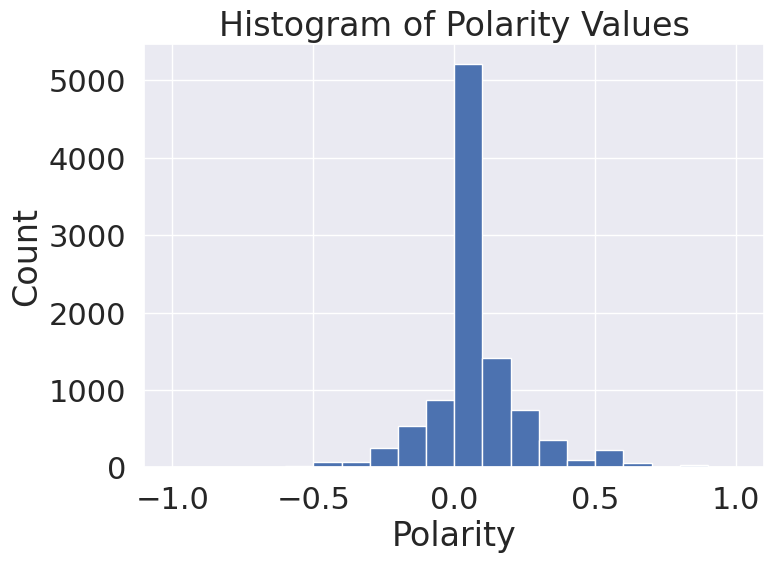

In [30]:
# Create a histogram of the polarity values
plt.hist(df['polarity_score'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Polarity Values')
plt.xlabel('Polarity')
plt.ylabel('Count')

# Show the plot
plt.show()

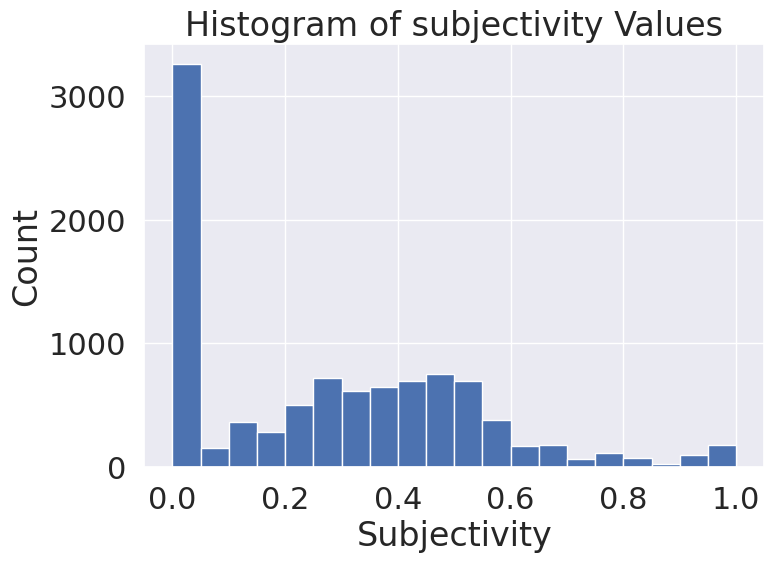

In [31]:
# Create a histogram of the subjectivity values
plt.hist(df['subjectivity_score'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of subjectivity Values')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

# Show the plot
plt.show()

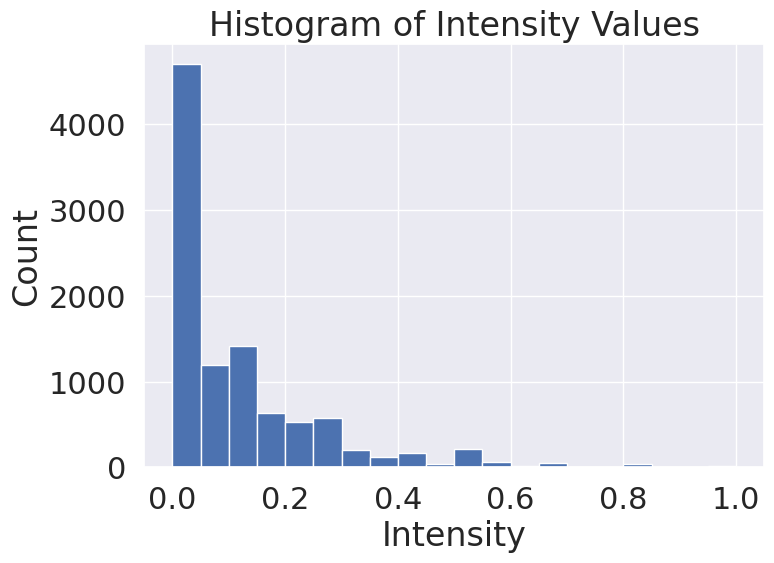

In [32]:
# Create a histogram of the polarity values
plt.hist(df['intensity'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Intensity Values')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Show the plot
plt.show()

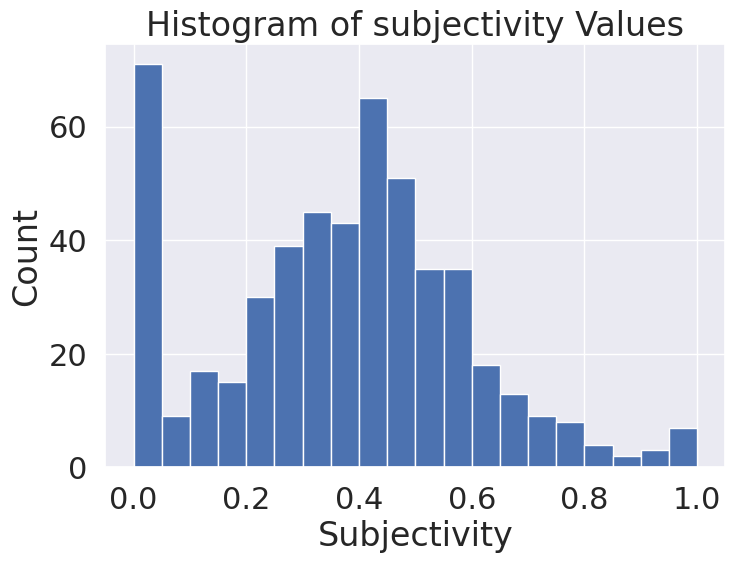

In [33]:
# Create a histogram of the subjectivity values
plt.hist(women_df['subjectivity_score'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of subjectivity Values')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

# Show the plot
plt.show()

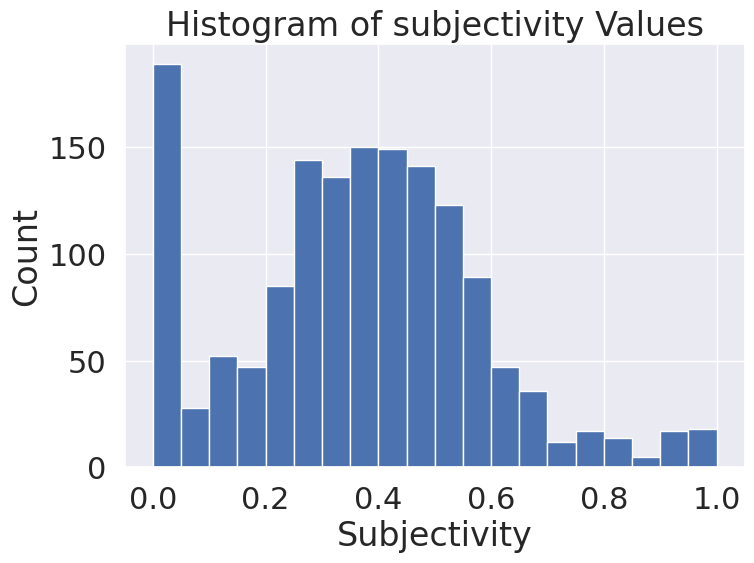

In [34]:
# Create a histogram of the subjectivity values
plt.hist(men_df['subjectivity_score'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of subjectivity Values')
plt.xlabel('Subjectivity')
plt.ylabel('Count')

# Show the plot
plt.show()

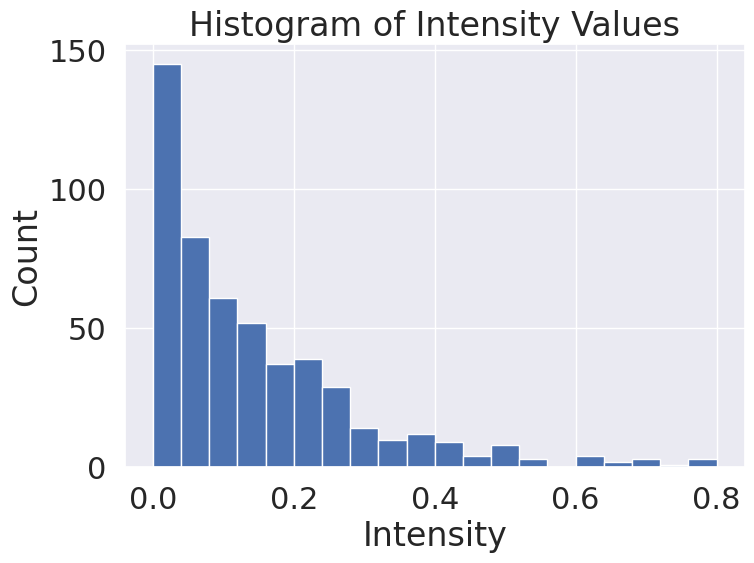

In [35]:
# Create a histogram of the polarity values
plt.hist(women_df['intensity'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Intensity Values')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Show the plot
plt.show()

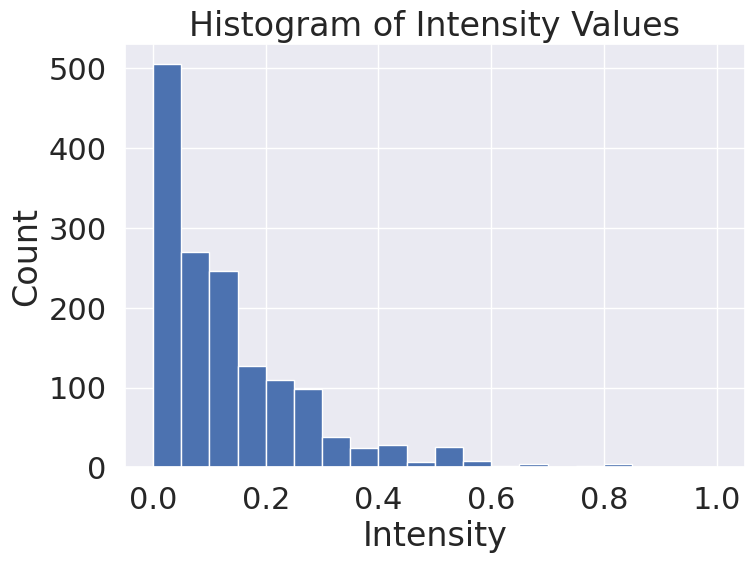

In [36]:
# Create a histogram of the polarity values
plt.hist(men_df['intensity'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Intensity Values')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Show the plot
plt.show()

##Polarity, Intensity & Subjectivity for all articles
plot the change in polarity & subjectivity over decade 

###Polarity

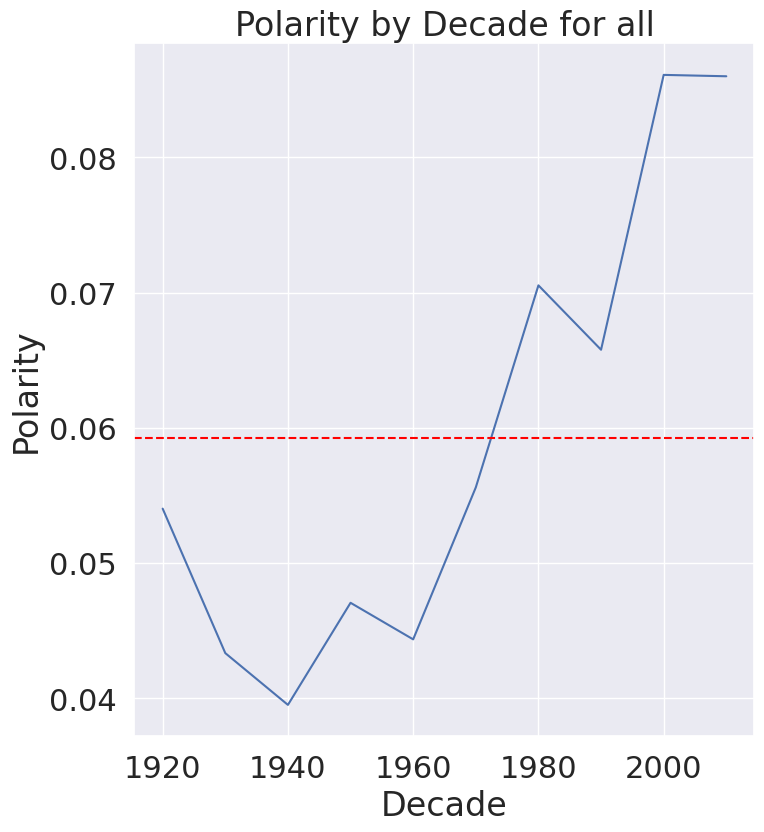

In [37]:
#find mean polarity per year
mean_polarity = np.mean(decade_avg['polarity_score'])

#plot change in polarity over decades
polarity_decade_plot = decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'polarity_score',
                       title = 'Polarity by Decade for all',
                       xlabel = 'Decade',
                       ylabel = 'Polarity',
                       legend = False,
                       figsize = (8,9))

#add mean line
polarity_decade_plot.axhline(y=mean_polarity, linestyle = '--', color = 'red')

###Intensity

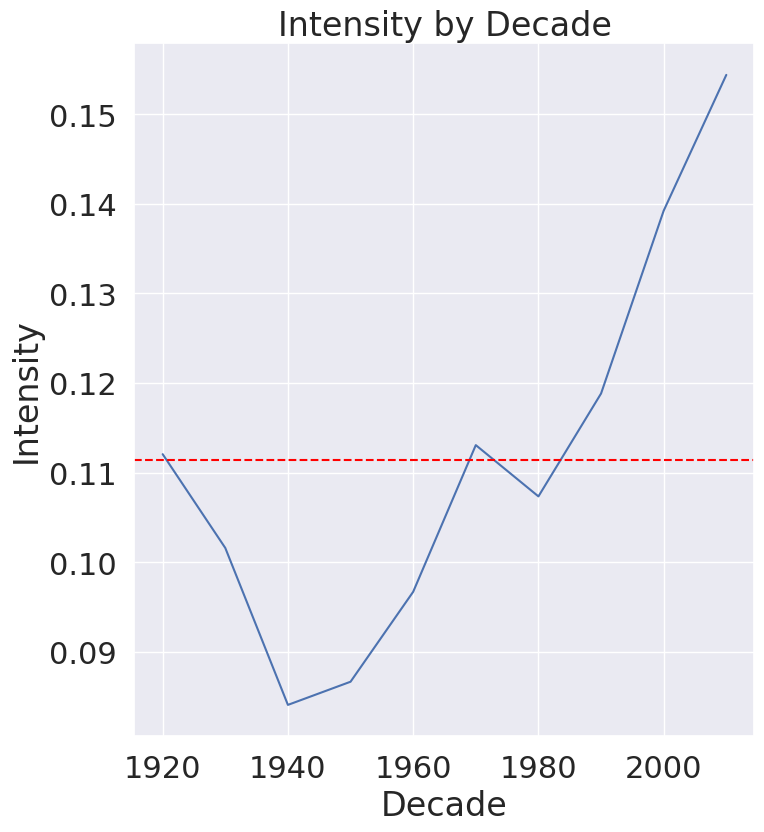

In [38]:
#find mean intensity per year
mean_intensity = np.mean(decade_avg['intensity'])

#plot change in intensity over decades
intensity_decade_plot = decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'intensity',
                       title = 'Intensity by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Intensity',
                       legend = False,
                       figsize = (8,9))

#add mean line
intensity_decade_plot.axhline(y=mean_intensity, linestyle = '--', color = 'red')

###Subjectivity

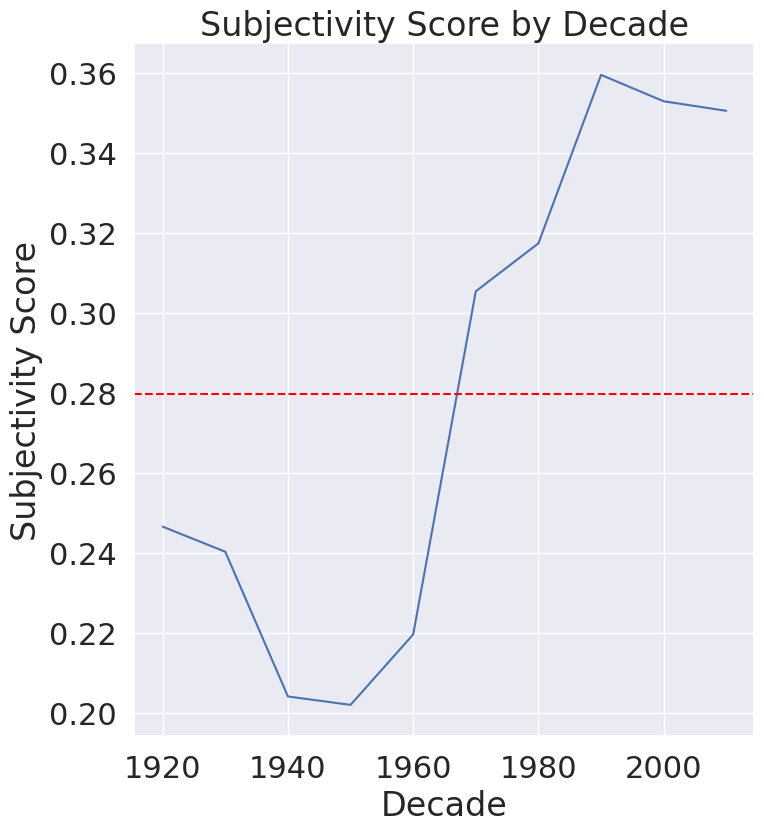

In [39]:
#find mean subjectivity per year
mean_sub = np.mean(decade_avg['subjectivity_score'])

#plot change in subjectivity over decades
sub_decade_plot = decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'subjectivity_score',
                       title = 'Subjectivity Score by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Subjectivity Score',
                       legend = False,
                       figsize = (8,9))

#add mean line
sub_decade_plot.axhline(y=mean_sub, linestyle = '--', color = 'red')

##Polarity, Intensity & Subjectivity for Women

###Polarity

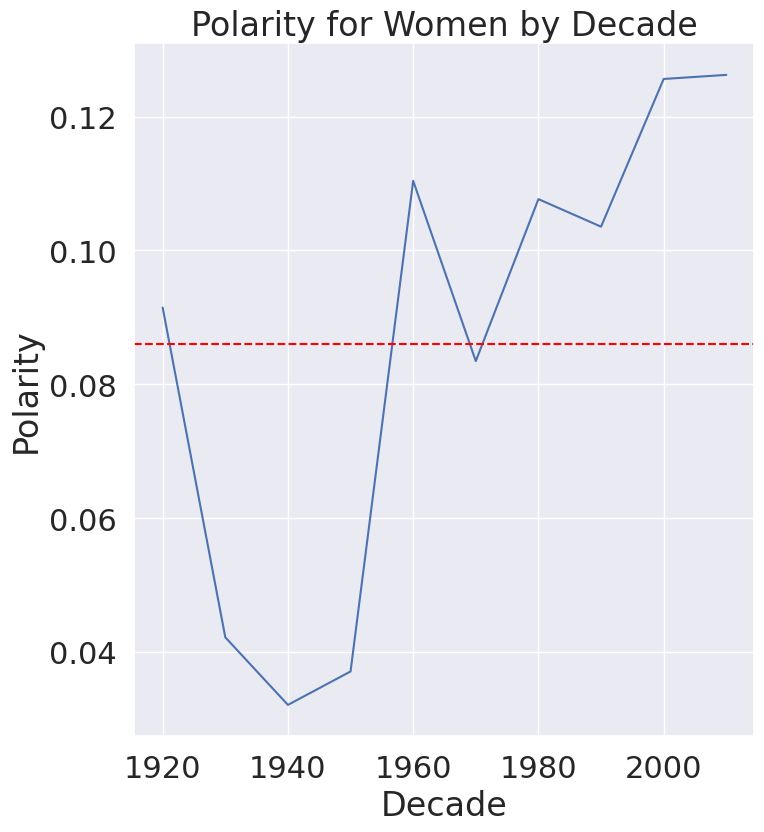

In [40]:
#find mean polarity per year
women_mean_polarity = np.mean(women_decade_avg['polarity_score'])

#plot change in polarity over decades
women_polarity_decade_plot = women_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'polarity_score',
                       title = 'Polarity for Women by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Polarity',
                       legend = False,
                       figsize = (8,9))

#add mean line
women_polarity_decade_plot.axhline(y=women_mean_polarity, linestyle = '--', color = 'red')

###Intensity

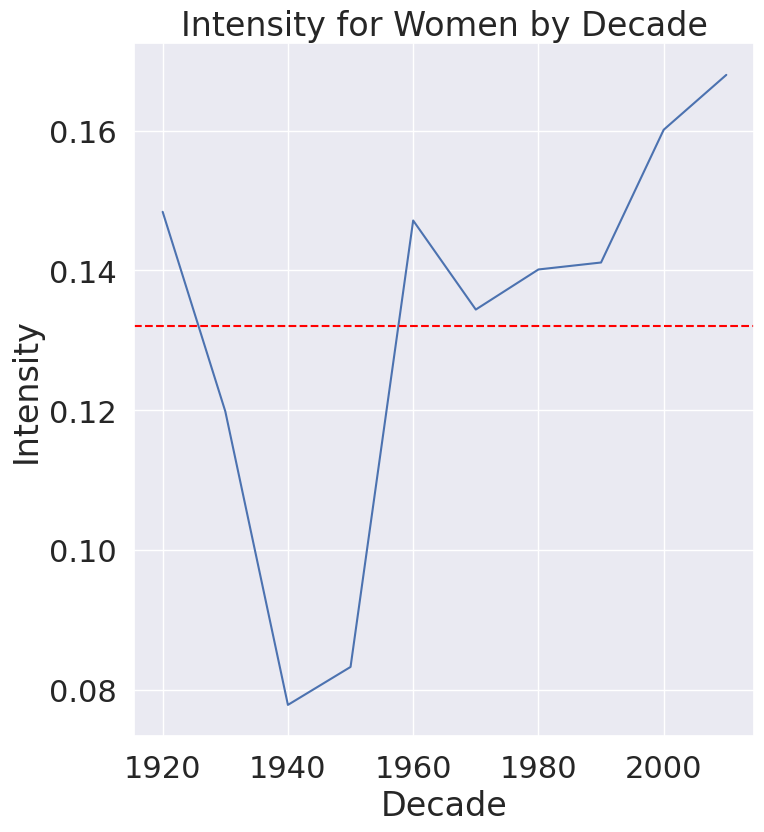

In [41]:
#find mean intensity per year
women_mean_intensity = np.mean(women_decade_avg['intensity'])

#plot change in intensity over decades
women_intensity_decade_plot = women_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'intensity',
                       title = 'Intensity for Women by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Intensity',
                       legend = False,
                       figsize = (8,9))

#add mean line
women_intensity_decade_plot.axhline(y=women_mean_intensity, linestyle = '--', color = 'red')

###Subjectivity

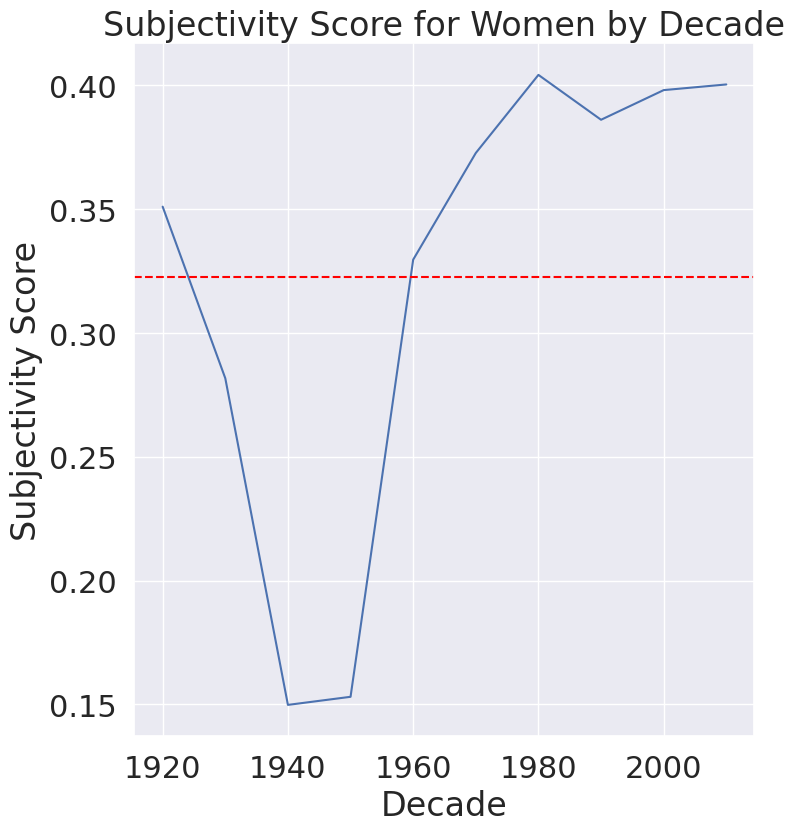

In [42]:
#find mean subjectivity per year
women_mean_sub = np.mean(women_decade_avg['subjectivity_score'])

#plot change in subjectivity over decades
women_sub_decade_plot = women_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'subjectivity_score',
                       title = 'Subjectivity Score for Women by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Subjectivity Score',
                       legend = False,
                       figsize = (8,9))

#add mean line
women_sub_decade_plot.axhline(y=women_mean_sub, linestyle = '--', color = 'red')

##Polarity, intensity & Subjectivity for Men

###Polarity

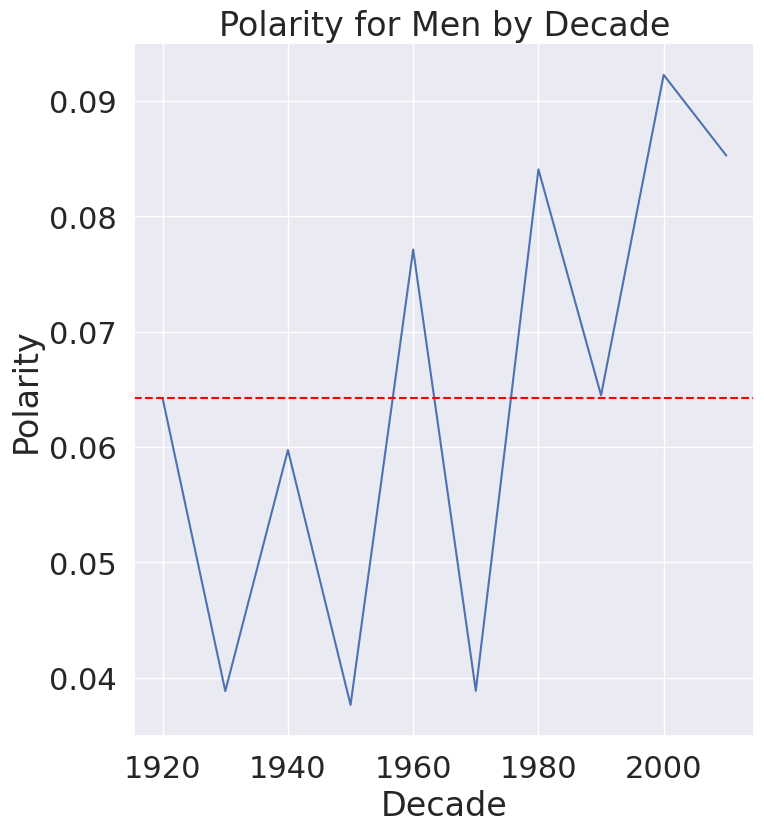

In [43]:
#find mean polarity per year
men_mean_polarity = np.mean(men_decade_avg['polarity_score'])

#plot change in polarity over decades
men_polarity_decade_plot = men_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'polarity_score',
                       title = 'Polarity for Men by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Polarity',
                       legend = False,
                       figsize = (8,9))

#add mean line
men_polarity_decade_plot.axhline(y=men_mean_polarity, linestyle = '--', color = 'red')

###Intensity

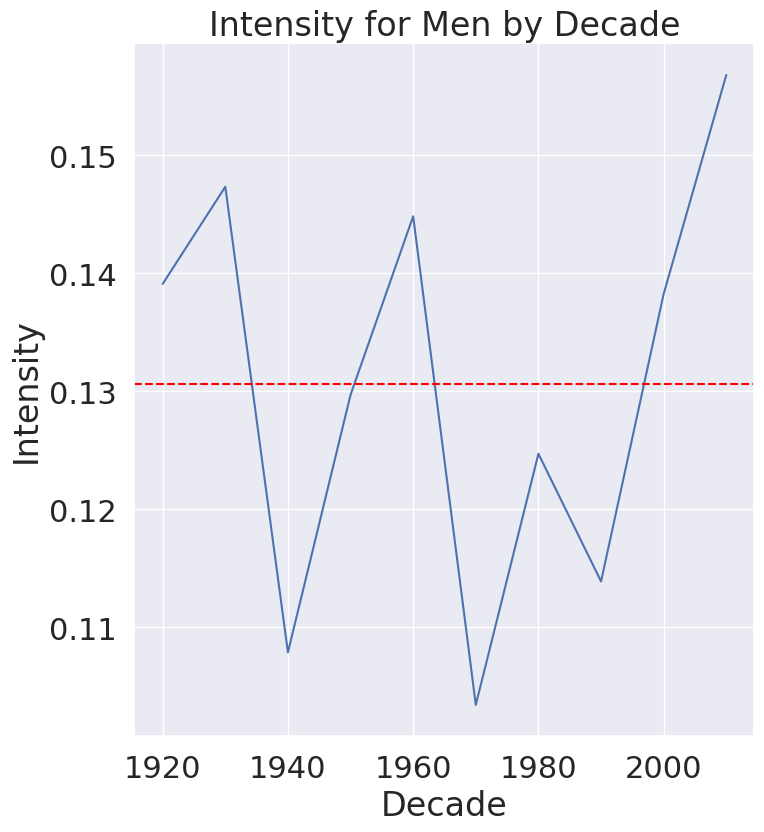

In [44]:
#find mean intensity per year
men_mean_intensity = np.mean(men_decade_avg['intensity'])

#plot change in intensity over decades
men_intensity_decade_plot = men_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'intensity',
                       title = 'Intensity for Men by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Intensity',
                       legend = False,
                       figsize = (8,9))

#add mean line
men_intensity_decade_plot.axhline(y=men_mean_intensity, linestyle = '--', color = 'red')

###Subjectivity

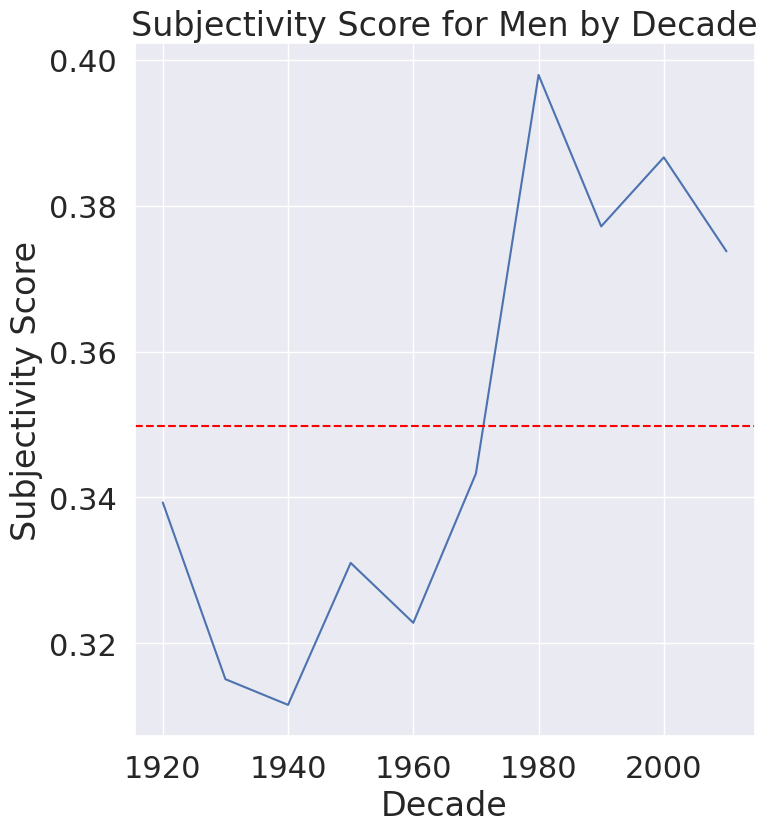

In [45]:
#find mean subjectivity per year
men_mean_sub = np.mean(men_decade_avg['subjectivity_score'])

#plot change in subjectivity over decades
men_sub_decade_plot = men_decade_avg.plot(kind = 'line',
                       x = 'decade', 
                       y = 'subjectivity_score',
                       title = 'Subjectivity Score for Men by Decade',
                       xlabel = 'Decade',
                       ylabel = 'Subjectivity Score',
                       legend = False,
                       figsize = (8,9))

#add mean line
men_sub_decade_plot.axhline(y=men_mean_sub, linestyle = '--', color = 'red')

##Frequency of sentiment for all

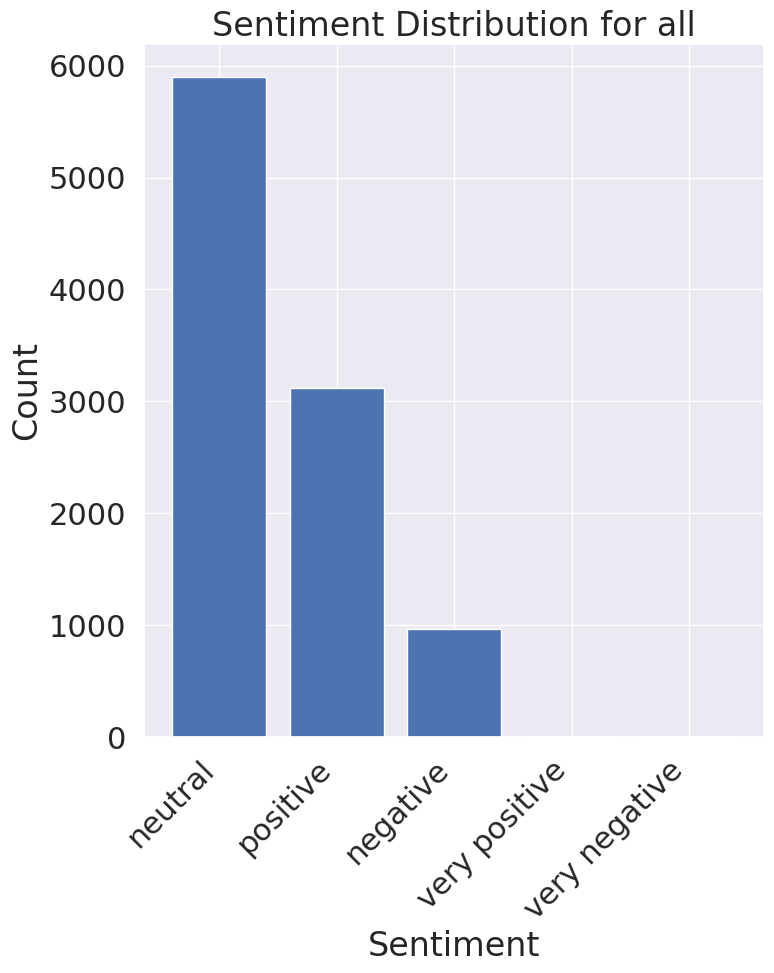

In [46]:
# Count the number of rows for each sentiment value
counts = df['sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 9))

# Make a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for all')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

##Freq Sentiment for Women

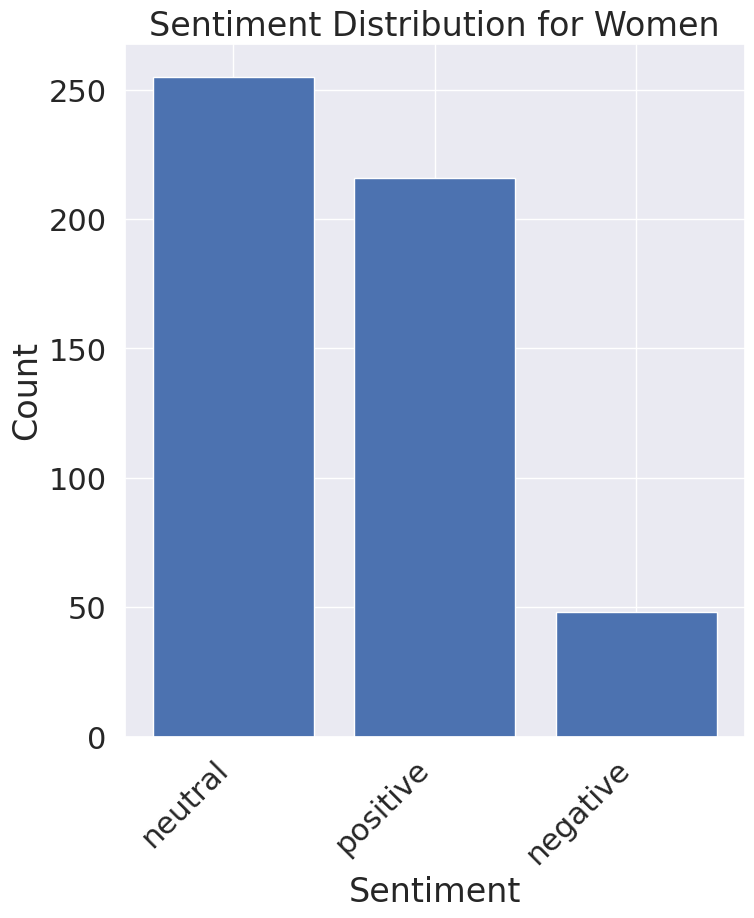

In [47]:
# Count the number of rows for each sentiment value
counts = women_df['sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 9))

# Make a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Women')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

##Freq Sentiment for Men

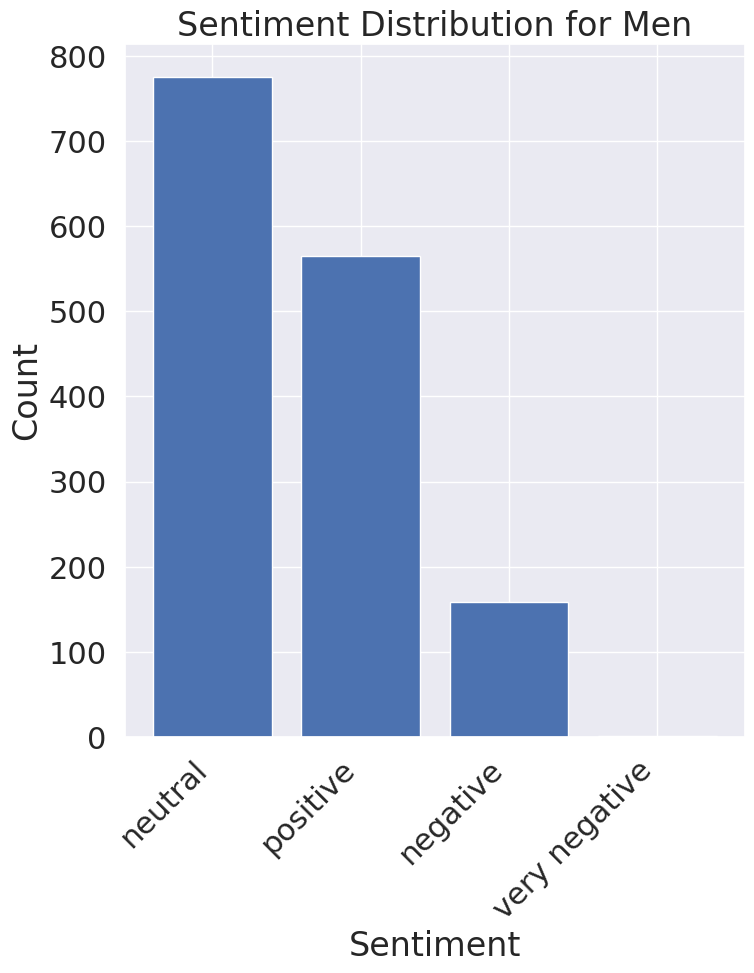

In [48]:
# Count the number of rows for each sentiment value
counts = men_df['sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 9))

# Make a bar chart
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Men')
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()